### Installation

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d saurabhshahane/twitter-sentiment-dataset

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 66% 5.00M/7.60M [00:00<00:00, 30.2MB/s]
100% 7.60M/7.60M [00:00<00:00, 42.8MB/s]


In [5]:
!unzip /content/twitter-sentiment-dataset.zip

Archive:  /content/twitter-sentiment-dataset.zip
  inflating: Twitter_Data.csv        


In [6]:
## fetching tweeter and reddit sentimental data
!kaggle datasets download -d cosmos98/twitter-and-reddit-sentimental-analysis-dataset

Dataset URL: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
License(s): CC-BY-NC-SA-4.0
 50% 5.00M/10.0M [00:00<00:00, 29.6MB/s]
100% 10.0M/10.0M [00:00<00:00, 52.6MB/s]


In [7]:
!unzip /content/twitter-and-reddit-sentimental-analysis-dataset.zip

Archive:  /content/twitter-and-reddit-sentimental-analysis-dataset.zip
  inflating: Reddit_Data.csv         
replace Twitter_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expression
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [10]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
## Printing the english stopwords...which does not add any meaning/influencial meaning from the textual data......
print(stopwords.words("english"))
#we will eventually remove this type of words from the textual corpus

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### working on Reddit dataset

In [12]:
#lets add other 30k data too
df_1 = pd.read_csv("/content/Reddit_Data.csv")
df_1.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [13]:
#df_1["Tweets"][df_1["Sentiments"] == 1][15]

In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [15]:
df_1.shape[0]

37249

In [16]:
df_1["category"].value_counts()

category
 1    15830
 0    13142
-1     8277
Name: count, dtype: int64

In [17]:
df_1.isna().sum()

clean_comment    100
category           0
dtype: int64

In [18]:
df_1.duplicated().sum()

449

In [19]:
dup = df_1[df_1.duplicated()]
dup

,clean_comment,category
375,,0
392,,0
605,NaN,0
617,aurum mom,0
651,,0
...,...,...
37111,NaN,0
37125,hari,0
37158,top kek,1
37234,this part series minute videos focusing each d...,1


In [20]:
#thus we do have this duplicated values in our dataframe
dup.shape[0]

449

In [21]:
df_1 = df_1.drop_duplicates()
df_1.shape[0]

36800

In [22]:
df_1.head(2)

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1


In [23]:
df_1 = df_1.rename(columns={"clean_comment": "Comments","category":"Sentiments"})
df_1.head(2)

,Comments,Sentiments
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1


In [24]:
df_1["Sentiments"].value_counts()

Sentiments
 1    15771
 0    12779
-1     8250
Name: count, dtype: int64

In [25]:
df_1.head()

,Comments,Sentiments
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [26]:
df_1.shape

(36800, 2)

#### Preprocessing the Textual Data from the data[comments]

In [27]:
## removving unnecessary strings
## Removing special characters, numbers and punctuations
df_1["Comments"]=df_1["Comments"].str.replace("[^a-zA-Z#]"," ")
df_1.shape

(36800, 2)

In [28]:
df_1["Comments"][15]

'does evil include the lady pai chunked '

In [29]:
df_1["Comments"].dtype

dtype('O')

In [30]:
### Removing shorter words
df_1["Comments"]=df_1["Comments"].astype(str).apply(lambda x: "  ".join([w for w in x.split() if len(w)>3]))
df_1.shape

(36800, 2)

In [31]:
df_1["Comments"][15]

'does  evil  include  lady  chunked'

#### applying tokenization, Stemming onto the textual data

In [32]:
tokenized_tweet_1 = df_1['Comments'].apply(lambda x: x.split())
tokenized_tweet_1.head()

0    [family, mormon, have, never, tried, explain, ...
1    [buddhism, very, much, compatible, with, chris...
2    [seriously, thing, first, they, complex, expla...
3    [what, have, learned, yours, only, yours, what...
4    [your, benefit, want, read, living, buddha, li...
Name: Comments, dtype: object

In [33]:
# Stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet_1 = tokenized_tweet_1.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

In [34]:
def reconstruct_sentence(tokens):
    return ' '.join(tokens)

In [35]:
tokenized_tweet_1

0        [famili, mormon, have, never, tri, explain, th...
1        [buddhism, veri, much, compat, with, christian...
2        [serious, thing, first, they, complex, explain...
3        [what, have, learn, your, onli, your, what, wa...
4        [your, benefit, want, read, live, buddha, live...
                               ...                        
37244                                               [jesu]
37245    [bhai, pure, saal, chutiya, banaya, modi, saal...
37246                      [downvot, karna, upvot, hogaya]
37247                                         [haha, nice]
37248                 [facebook, itself, work, bjp’, cell]
Name: Comments, Length: 36800, dtype: object

In [36]:
df_1.head(3)

,Comments,Sentiments
0,family mormon have never tried explain t...,1
1,buddhism very much compatible with christ...,1
2,seriously thing first they complex explai...,-1


In [37]:
df_1["Comments"] = tokenized_tweet_1.apply(reconstruct_sentence)

In [38]:
df_1.head()

,Comments,Sentiments
0,famili mormon have never tri explain them they...,1
1,buddhism veri much compat with christian espec...,1
2,serious thing first they complex explain norma...,-1
3,what have learn your onli your what want teach...,0
4,your benefit want read live buddha live christ...,1


In [39]:
df_1.shape

(36800, 2)

### Working on Tweeter dataset

In [40]:
df = pd.read_csv('/content/Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [42]:
df["category"].value_counts()

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

In [43]:
 df.describe()

,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [44]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [45]:
df = df.dropna()

In [46]:
df = df.drop_duplicates()

In [47]:
df.isna().sum()

clean_text    0
category      0
dtype: int64

In [48]:
df.duplicated().sum()

0

In [49]:
df.head(2)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0


In [50]:
df =df.rename(columns ={"clean_text":"Comments","category": "Sentiments"})
df.head()

,Comments,Sentiments
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [51]:
df.shape[0]
#so i do have 162k data combining 0,1,-1 from 2nd dataset

162969

In [52]:
df["Sentiments"].value_counts()

Sentiments
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64

In [53]:
df.shape

(162969, 2)

#### Preprocessing The textual columns

In [54]:
df["Comments"]=df["Comments"].str.replace("[^a-zA-Z#]"," ")
df.shape

(162969, 2)

In [55]:
df["Comments"][1]

'talk all the nonsense and continue all the drama will vote for modi '

In [56]:
df["Comments"] = df["Comments"].astype(str).apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.shape

(162969, 2)

In [57]:
df["Comments"][1]

'talk nonsense continue drama will vote modi'

#### tokenized tweets

In [58]:
tokenized_tweet = df["Comments"].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, modi, promised, “minimum, government, m...
1    [talk, nonsense, continue, drama, will, vote, ...
2    [what, just, vote, modi, welcome, told, rahul,...
3    [asking, supporters, prefix, chowkidar, their,...
4    [answer, among, these, most, powerful, world, ...
Name: Comments, dtype: object

In [59]:
## Stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, modi, promis, “minimum, govern, maximum...
1    [talk, nonsens, continu, drama, will, vote, modi]
2    [what, just, vote, modi, welcom, told, rahul, ...
3    [ask, support, prefix, chowkidar, their, name,...
4    [answer, among, these, most, power, world, lea...
Name: Comments, dtype: object

In [60]:
len(tokenized_tweet)

162969

In [61]:
len(df["Comments"])

162969

In [62]:
print(f"Length of tokenized_tweet: {len(tokenized_tweet)}")
print(f"Number of rows in df: {len(df)}")

Length of tokenized_tweet: 162969
Number of rows in df: 162969


In [63]:
def reconstruct_sentence(tokens):
    return ' '.join(tokens)


In [64]:
# Apply the reconstruction function
df['Comments'] = tokenized_tweet.apply(reconstruct_sentence)

In [65]:
df.head()

,Comments,Sentiments
0,when modi promis “minimum govern maximum gover...,-1.0
1,talk nonsens continu drama will vote modi,0.0
2,what just vote modi welcom told rahul main cam...,1.0
3,ask support prefix chowkidar their name modi g...,1.0
4,answer among these most power world leader tod...,1.0


In [66]:
len(tokenized_tweet)

162969

In [67]:
df[60:65]

,Comments,Sentiments
60,anchor do canva against modi journal,-1.0
61,slam maker biopic deliber use name credit,0.0
62,will these channel modi also scare contest fro...,-1.0
63,thi india thi india centuri becaus yuva shakti...,1.0
64,sure will inform famili friend give record num...,1.0


### Making a one new dataset

In [68]:
df_tweets_reddits = pd.concat([df,df_1],axis=0)
df_tweets_reddits.shape

(199769, 2)

In [69]:
df_tweets_reddits.head()

,Comments,Sentiments
0,when modi promis “minimum govern maximum gover...,-1.0
1,talk nonsens continu drama will vote modi,0.0
2,what just vote modi welcom told rahul main cam...,1.0
3,ask support prefix chowkidar their name modi g...,1.0
4,answer among these most power world leader tod...,1.0


In [70]:
df_tweets_reddits["Sentiments"].value_counts()

Sentiments
 1.0    88020
 0.0    67990
-1.0    43759
Name: count, dtype: int64

In [71]:
df_tweets_reddits.isna().sum()

Comments      0
Sentiments    0
dtype: int64

In [72]:
df_tweets_reddits.duplicated().sum()

6127

In [73]:
df_tweets_reddits = df_tweets_reddits.drop_duplicates()
df_tweets_reddits = df_tweets_reddits.dropna()
df_tweets_reddits.shape

(193642, 2)

In [74]:
df_positive = df_tweets_reddits[df_tweets_reddits["Sentiments"] == 0]
df_negative = df_tweets_reddits[df_tweets_reddits["Sentiments"] == -1]
df_neutral = df_tweets_reddits[df_tweets_reddits["Sentiments"] == 1]

In [75]:
min_size = min(len(df_positive),len(df_negative),len(df_neutral))
min_size

42900

In [76]:
df_positive_samples = df_positive.sample(n=min_size,random_state=42)
df_negative_samples = df_negative.sample(n=min_size,random_state=42)
df_neutral_samples = df_neutral.sample(n=min_size,random_state=42)

In [77]:
final_tweets_reddits = pd.concat([df_positive_samples,df_negative_samples,df_neutral_samples],axis=0)
final_tweets_reddits.shape

(128700, 2)

In [78]:
final_tweets_reddits["Sentiments"].value_counts()

Sentiments
 0.0    42900
-1.0    42900
 1.0    42900
Name: count, dtype: int64

#### Let's shuffle the whole dataset greatly

In [79]:
final_tweets_reddits = final_tweets_reddits.sample(frac=1,random_state=69).reset_index(drop=True)
final_tweets_reddits.head()

,Comments,Sentiments
0,media game❔❓ afraid modi❔❓ hungri over corrupt,-1.0
1,ganjeappreci fact that such capabl aren’ there...,-1.0
2,long live modi bharat scientist great achiev h...,1.0
3,narendra modi want know your address,1.0
4,bharat nagrik desh bhakti shak nahi sakta stan...,-1.0


In [80]:
# so we finally have all 3 category into same number of samples amount
final_tweets_reddits["Sentiments"].value_counts()

Sentiments
-1.0    42900
 1.0    42900
 0.0    42900
Name: count, dtype: int64

In [81]:
final_tweets_reddits.shape

(128700, 2)

### EDA

In [82]:
!pip install wordcloud

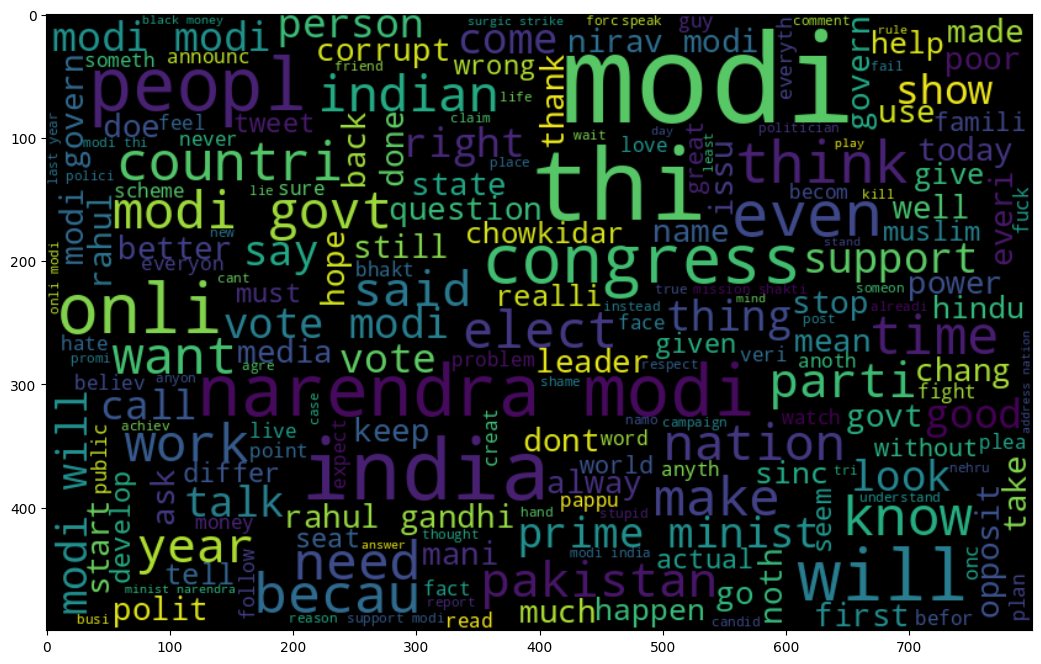

In [83]:
##visualize the frequent words
all_words = " ".join([sentence for sentence in final_tweets_reddits["Comments"]])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800,height = 500,random_state=42, max_font_size=100).generate(all_words)


#plot
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis=("off")
plt.show()

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words="english")
bag_of_words =  bag_of_words.fit_transform(final_tweets_reddits["Comments"])


In [85]:
#bag_of_words[0].toarray()

### Applying Logistic Regression

In [86]:
X_train,X_test,y_train,y_test = train_test_split(bag_of_words,final_tweets_reddits["Sentiments"],test_size=0.2,random_state=42,stratify=final_tweets_reddits["Sentiments"])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
#passing 25% data to test and 75% to train as a data

(102960, 1000) (25740, 1000) (102960,) (25740,)


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
clf_lr = LogisticRegression()
clf_lr.fit(X_train,y_train)

LogisticRegression()

In [88]:
y_pred = clf_lr.predict(X_test)
y_pred

array([ 1.,  1.,  0., ..., -1., -1.,  1.])

In [89]:
y_test

98806     1.0
72929     0.0
116636    0.0
42576     1.0
63814     1.0
         ... 
69552     1.0
65376     0.0
85906    -1.0
44502     0.0
114215    1.0
Name: Sentiments, Length: 25740, dtype: float64

In [90]:
f1_score(y_test,y_pred,average="weighted")

0.7370866002964354

In [91]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7398601398601399

### SVM Model

##### Also using another methodology TFIDF here

In [92]:
#different method to convert the textual data int numeric format
# before we use BAG-OF-WORDS
#now we are using TFIDF Vectorizer to do them to convert to numeric format
X = final_tweets_reddits["Comments"]
y = final_tweets_reddits["Sentiments"]

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)
X

<128700x81373 sparse matrix of type '<class 'numpy.float64'>'
	with 1955636 stored elements in Compressed Sparse Row format>

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=final_tweets_reddits["Sentiments"])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
#passing 25% data to test and 75% to train as a data

(102960, 81373) (25740, 81373) (102960,) (25740,)


In [94]:
#we can witness that the categories are evenly divided into train and test .
y_train.value_counts()

Sentiments
 1.0    34320
 0.0    34320
-1.0    34320
Name: count, dtype: int64

In [95]:
y_test.value_counts()

Sentiments
 1.0    8580
 0.0    8580
-1.0    8580
Name: count, dtype: int64

In [96]:
clf = LinearSVC()#it is using L2 regularizer as a penalty
clf.fit(X_train,y_train)

LinearSVC()

In [97]:
y_pred = clf.predict(X_test)
y_pred

array([ 1.,  0.,  0., ..., -1.,  0.,  1.])

In [98]:
y_pred.shape

(25740,)

In [99]:
y_test.shape

(25740,)

### 85% accuracy on SVM

In [100]:
#we got 95% accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.831973581973582

In [101]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.84      0.80      0.82      8580
         0.0       0.80      0.91      0.85      8580
         1.0       0.85      0.78      0.82      8580

    accuracy                           0.83     25740
   macro avg       0.83      0.83      0.83     25740
weighted avg       0.83      0.83      0.83     25740



In [102]:
x = ["I hate you"]
#tfidf = TfidfVectorizer()
x = tfidf.transform(x)
clf.predict(x)

array([-1.])

In [103]:
x = ["My name is manoj"]

x = tfidf.transform(x)
clf.predict(x)

array([0.])

In [104]:
clf.predict(tfidf.transform(["just had the best meal ever at my favorite teachers house"]))

array([1.])

In [105]:
clf.predict(tfidf.transform(["it's raining outside. I guess it's a good day to stay indoors and relax"]))

array([1.])

In [106]:
clf.predict(tfidf.transform(["I can't believe the traffice today. Been stuck on the highway for hours. "]))

array([0.])

In [107]:
clf.predict(tfidf.transform(["I can't believe the traffice today. Been stuck on the highway for hours,makes me frustrated "]))

array([0.])

In [108]:
clf.predict(tfidf.transform(["It's a sunny day"]))

array([0.])

In [109]:
clf.predict(tfidf.transform(["weather is 90* today"]))

array([0.])

In [110]:
clf.predict(tfidf.transform(["The heat is killing me"]))

array([0.])

In [111]:
#it should be 0 neutral but its taking 1 positive because i guess GOOD keyword
clf.predict(tfidf.transform(["Can someone recommend a good book to read this summer?"]))

array([1.])

### Preprocessing it

In [112]:
final_tweets_reddits["Sentiments"].value_counts()

Sentiments
-1.0    42900
 1.0    42900
 0.0    42900
Name: count, dtype: int64

In [113]:
final_tweets_reddits.head(10)

,Comments,Sentiments
0,media game❔❓ afraid modi❔❓ hungri over corrupt,-1.0
1,ganjeappreci fact that such capabl aren’ there...,-1.0
2,long live modi bharat scientist great achiev h...,1.0
3,narendra modi want know your address,1.0
4,bharat nagrik desh bhakti shak nahi sakta stan...,-1.0
5,modi attack grand allianc battl shift delhi ep...,1.0
6,center state nota,-1.0
7,onli indian redditor undertand stupid modi gov...,-1.0
8,uniti movement shri narendra modi ekta sandesh...,0.0
9,ziad cant hippocr question zaid jiss gujarat l...,0.0


In [114]:
final_tweets_reddits["Comments"] = final_tweets_reddits["Comments"].apply(lambda x:x.lower())

In [115]:
final_tweets_reddits.head(20)

,Comments,Sentiments
0,media game❔❓ afraid modi❔❓ hungri over corrupt,-1.0
1,ganjeappreci fact that such capabl aren’ there...,-1.0
2,long live modi bharat scientist great achiev h...,1.0
3,narendra modi want know your address,1.0
4,bharat nagrik desh bhakti shak nahi sakta stan...,-1.0
5,modi attack grand allianc battl shift delhi ep...,1.0
6,center state nota,-1.0
7,onli indian redditor undertand stupid modi gov...,-1.0
8,uniti movement shri narendra modi ekta sandesh...,0.0
9,ziad cant hippocr question zaid jiss gujarat l...,0.0


### Random Forest Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier()
clf_rfc.fit(X_train,y_train)

RandomForestClassifier()

In [117]:
y_pred_rfc =clf_rfc.predict(X_test)
y_pred_rfc

array([ 1.,  0.,  0., ..., -1., -1.,  1.])

In [118]:
y_pred_rfc.shape

(25740,)

In [119]:
accuracy_rfc = accuracy_score(y_test,y_pred_rfc)
accuracy_rfc

0.7878399378399379

In [120]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

        -1.0       0.77      0.76      0.77      8580
         0.0       0.78      0.88      0.82      8580
         1.0       0.82      0.73      0.77      8580

    accuracy                           0.79     25740
   macro avg       0.79      0.79      0.79     25740
weighted avg       0.79      0.79      0.79     25740



In [121]:
clf_rfc.predict(tfidf.transform(["Can someone recommend a good book to read this summer?"]))

array([1.])

### Naive Bayes

In [122]:
from sklearn.naive_bayes import MultinomialNB
clf_nb = MultinomialNB()
clf_nb.fit(X_train,y_train)

MultinomialNB()

In [123]:
y_pred_nb = clf_nb.predict(X_test)
y_pred_nb

array([ 1.,  1., -1., ..., -1., -1.,  1.])

In [124]:
y_pred_nb.shape, y_test.shape

((25740,), (25740,))

In [125]:
accuracy_nb = accuracy_score(y_test,y_pred_nb)
accuracy_nb

0.6716783216783216

In [126]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

        -1.0       0.61      0.81      0.70      8580
         0.0       0.83      0.48      0.61      8580
         1.0       0.66      0.73      0.69      8580

    accuracy                           0.67     25740
   macro avg       0.70      0.67      0.67     25740
weighted avg       0.70      0.67      0.67     25740



In [127]:
clf_nb.predict(tfidf.transform(["Can someone recommend a good book to read this summer?"]))

array([1.])

In [128]:
clf_nb.predict(tfidf.transform(["he is shouting on me!!"]))

array([1.])

In [129]:
clf_nb.predict(tfidf.transform(["are you Mad!!!!"]))

array([-1.])

In [130]:
clf_nb.predict(tfidf.transform(["i am ready to dance"]))

array([0.])